#  Q1: Reading and Computing statistics of a Raster Image

In [2]:
from osgeo import gdal

In [3]:
import os
os.chdir(r"E:\PYTHON-ASSIGNMENT")

In [4]:
ds=gdal.Open('LC08_L1TP_142040_20211217_20211223_01_T1_B1.tif')
print(ds)


<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x0000021EA3E14C90> >


Reading: Obtaining all information

In [5]:
# Obtaining the information of the raster image of intrest at once

!gdalinfo LC08_L1TP_142040_20211217_20211223_01_T1_B1.tif

Driver: GTiff/GeoTIFF
Files: LC08_L1TP_142040_20211217_20211223_01_T1_B1.tif
       LC08_L1TP_142040_20211217_20211223_01_T1_B1.tif.aux.xml
       .\LC08_L1TP_142040_20211217_20211223_01_T1_MTL.txt
Size is 7781, 7921
Coordinate System is:
PROJCS["WGS 84 / UTM zone 45N",
    GEOGCS["WGS 84",
        DATUM["WGS_1984",
            SPHEROID["WGS 84",6378137,298.257223563,
                AUTHORITY["EPSG","7030"]],
            AUTHORITY["EPSG","6326"]],
        PRIMEM["Greenwich",0,
            AUTHORITY["EPSG","8901"]],
        UNIT["degree",0.0174532925199433,
            AUTHORITY["EPSG","9122"]],
        AUTHORITY["EPSG","4326"]],
    PROJECTION["Transverse_Mercator"],
    PARAMETER["latitude_of_origin",0],
    PARAMETER["central_meridian",87],
    PARAMETER["scale_factor",0.9996],
    PARAMETER["false_easting",500000],
    PARAMETER["false_northing",0],
    UNIT["metre",1,
        AUTHORITY["EPSG","9001"]],
    AXIS["Easting",EAST],
    AXIS["Northing",NORTH],
    AUTHORITY["EPSG","326

Reading: individual information

In [6]:
#getting X and Y size of the Raster
ds.RasterXSize,ds.RasterYSize


(7781, 7921)

In [7]:
#getting projection info of the image
ds.GetProjection()

'PROJCS["WGS 84 / UTM zone 45N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",87],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32645"]]'

In [8]:
#Obtaining the transformation parameters
ds.GetGeoTransform()

(100185.0, 30.0, 0.0, 3315315.0, 0.0, -30.0)

In [9]:
#getting height and width info of the image

source_geotransform = ds.GetGeoTransform()
source_width = source_geotransform[1]
source_height = source_geotransform[5]
source_width,source_height

(30.0, -30.0)

In [10]:
#obtaining the number of bands in raster image
ds.RasterCount


1

In [11]:
#obtaining band information in array format
band = ds.GetRasterBand(1)
data = band.ReadAsArray()
data

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)

In [23]:
band

<osgeo.gdal.Band; proxy of <Swig Object of type 'GDALRasterBandShadow *' at 0x0000021EA4483300> >

Interactive visualization

Text(0.5, 1.0, 'Composite')

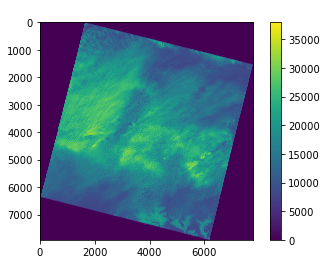

In [13]:
#Using matplotlib for interactive visualization

import matplotlib.pyplot as plt
plt.imshow(data,cmap='viridis') 
plt.colorbar()
plt.title('Composite',color='white')
#commonly used cmap are inferno,magma,plasma, viridis

Computing the statistics of a raster data

In [14]:
#[min,max,mean and SD]

band.ComputeStatistics(False)

[0.0, 37973.0, 11479.474310600368, 9259.5926256751]

# Q2.Perform layerstacking and mosaicing lab

In [15]:
# opeanin 3 raster files to stack

files = ['LC08_L1TP_142040_20211217_20211223_01_T1_B1.tif','LC08_L1TP_142040_20211217_20211223_01_T1_B2.tif','LC08_L1TP_142040_20211217_20211223_01_T1_B3.tif']

In [16]:
data_list = list()
for i in files:
    ds = gdal.Open(i)
    data_list.append(ds)

print(ds)

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x0000021EA442BEA0> >


In [17]:
#creating a driver
driver = gdal.GetDriverByName('GTIFF')
driver

<osgeo.gdal.Driver; proxy of <Swig Object of type 'GDALDriverShadow *' at 0x0000021EBD213420> >

In [18]:
# Creating a blank 3bands file
out_ds = driver.Create('stacked_finalAP.tif',data_list[0].GetRasterBand(1).XSize,data_list[0].GetRasterBand(1).YSize,3,data_list[0].GetRasterBand(1).DataType)

In [19]:
# obtaining and setting projection and transformation info
out_ds.SetProjection(data_list[0].GetProjection())
out_ds.SetGeoTransform(data_list[0].GetGeoTransform())

0

In [20]:
# setting up Band info
out_ds.GetRasterBand(3).WriteArray(data_list[0].GetRasterBand(1).ReadAsArray())
out_ds.GetRasterBand(2).WriteArray(data_list[1].GetRasterBand(1).ReadAsArray())
out_ds.GetRasterBand(1).WriteArray(data_list[2].GetRasterBand(1).ReadAsArray())

0

In [21]:
# clearing cache files at the end
out_ds.FlushCache()
del files